<a href="https://colab.research.google.com/github/lg960214/DACON_Seoul_6/blob/feat%2Flhg/Ihk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#테스트

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 16.7 MB 31.2 MB/s 
     |████████████████████████████████| 6.3 MB 46.8 MB/s 


In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dir_shp = '/content/drive/MyDrive/DACON6/서울시 지리 정보/통계지역경계/집계구.shp'
plt.rcParams['figure.figsize'] = (20, 20)
seoul = gpd.read_file(dir_shp)

In [13]:
dir_subway_eld = '/content/drive/MyDrive/DACON6/지하철 이용 정보/서울교통공사_역별 일별 시간대별 노인 승하차인원 정보_20220531.csv'
df_sub1 = pd.read_csv(dir_subway_eld, encoding='cp949')
date = np.unique(df_sub1['일자'])[-1]
df_sub1 = df_sub1[df_sub1['일자']==date]
df_sub1_ride = df_sub1[df_sub1['구분']=='합계 : 승차']
df_sub1_off = df_sub1[df_sub1['구분']=='합계 : 하차']
df_sub1_ride = df_sub1_ride.iloc[:, 3:].drop(columns=['구분'])

In [14]:
from shapely.geometry import Point
dir_subway_pos = '/content/drive/MyDrive/DACON6/지하철 시설 정보/서울시 역사마스터 정보.csv'
df_sub2 = pd.read_csv(dir_subway_pos, encoding='cp949')
df_sub2['역명'] = df_sub2['역사명']
df_sub2 = df_sub2.drop(columns=['역사명', '호선', '역사_ID'])

df_sub = pd.merge(df_sub1_off, df_sub2, on='역명')
df_sub = df_sub.groupby(by='역명').mean()
df_sub['역명'] = df_sub.index
df_sub.index = list(range(len(df_sub)))

In [15]:
s = gpd.GeoSeries([Point(x, y) for x, y in zip(df_sub['위도'], df_sub['경도'])])
geodf = gpd.GeoDataFrame(df_sub, geometry=s)
geodf.crs = 'epsg:4326'
geodf = geodf.to_crs(epsg=5179)
geodf.drop(columns=['연번', '역번호'])

,06시이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시이후,위도,경도,역명,geometry
0,30.0,96.5,83.0,110.0,147.5,177.0,195.5,176.5,149.5,180.0,...,111.0,76.0,63.5,49.5,28.5,19.0,127.118077,37.492566,가락시장,POINT (966238.430 1943770.120)
1,105.0,182.0,174.0,262.0,256.0,228.0,194.0,152.0,170.0,155.0,...,57.0,36.0,31.0,15.0,9.0,2.0,126.882619,37.480959,가산디지털단지,POINT (945415.473 1942592.875)
2,188.0,398.0,256.0,305.0,472.0,455.0,395.0,337.0,368.0,375.0,...,136.0,74.0,62.0,31.0,39.0,15.0,127.028008,37.497414,강남,POINT (958279.030 1944343.976)
3,39.0,140.0,117.0,146.0,135.0,153.0,95.0,106.0,116.0,101.0,...,51.0,35.0,33.0,32.0,16.0,6.0,127.041203,37.517324,강남구청,POINT (959456.157 1946547.154)
4,18.0,107.0,135.0,267.0,237.0,229.0,213.0,255.0,354.0,282.0,...,162.0,127.0,89.0,83.0,48.0,20.0,127.132481,37.535804,강동,POINT (967530.428 1948561.971)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,28.0,131.0,117.0,179.0,238.0,289.0,244.0,312.0,335.0,353.0,...,337.0,232.0,183.0,127.0,85.0,35.0,126.943736,37.589066,홍제,POINT (950890.044 1954553.036)
231,17.0,113.0,107.0,186.0,189.0,242.0,247.0,256.0,299.0,295.0,...,354.0,259.0,198.0,128.0,96.0,52.0,126.840461,37.541513,화곡,POINT (941735.253 1949336.244)
232,16.0,31.0,47.0,44.0,53.0,87.0,67.0,86.0,92.0,78.0,...,76.0,70.0,69.0,40.0,28.0,18.0,127.084689,37.620064,화랑대(서울여대입구),POINT (963349.405 1957927.759)
233,15.0,237.0,233.0,312.0,550.0,856.0,1292.0,952.0,782.0,753.0,...,66.0,45.0,26.0,23.0,17.0,11.0,126.978246,37.558514,회현(남대문시장),POINT (953917.971 1951145.953)


In [16]:
from tqdm import tqdm

target_idx = 0
seoul['heat'] = 0
heatlist = []
station_centroid = seoul.geometry.centroid
station_len = len(geodf)
def weight_func(x):
  return 10 ** (0.0005 * -x)

for i in tqdm(range(len(seoul))):
  center = station_centroid[i]
  heat = 0
  for j in range(len(geodf)):
    raw = geodf.iloc[j, target_idx]
    pos = geodf.geometry[j]
    d = raw * weight_func(((center.x-pos.x)**2+(center.y-pos.y)**2)**0.5) / station_len
    heat += d
  heatlist.append(heat)
seoul['heat'] = heatlist

100%|██████████| 19153/19153 [09:18<00:00, 34.29it/s]


In [17]:
geodf

,연번,역번호,06시이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시이후,위도,경도,역명,geometry
0,81997.0,1579.0,30.0,96.5,83.0,110.0,147.5,177.0,195.5,176.5,...,111.0,76.0,63.5,49.5,28.5,19.0,127.118077,37.492566,가락시장,POINT (966238.430 1943770.120)
1,82144.0,2748.0,105.0,182.0,174.0,262.0,256.0,228.0,194.0,152.0,...,57.0,36.0,31.0,15.0,9.0,2.0,126.882619,37.480959,가산디지털단지,POINT (945415.473 1942592.875)
2,81708.0,222.0,188.0,398.0,256.0,305.0,472.0,455.0,395.0,337.0,...,136.0,74.0,62.0,31.0,39.0,15.0,127.028008,37.497414,강남,POINT (958279.030 1944343.976)
3,82112.0,2732.0,39.0,140.0,117.0,146.0,135.0,153.0,95.0,106.0,...,51.0,35.0,33.0,32.0,16.0,6.0,127.041203,37.517324,강남구청,POINT (959456.157 1946547.154)
4,81960.0,2549.0,18.0,107.0,135.0,267.0,237.0,229.0,213.0,255.0,...,162.0,127.0,89.0,83.0,48.0,20.0,127.132481,37.535804,강동,POINT (967530.428 1948561.971)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,81776.0,314.0,28.0,131.0,117.0,179.0,238.0,289.0,244.0,312.0,...,337.0,232.0,183.0,127.0,85.0,35.0,126.943736,37.589066,홍제,POINT (950890.044 1954553.036)
231,81898.0,2518.0,17.0,113.0,107.0,186.0,189.0,242.0,247.0,256.0,...,354.0,259.0,198.0,128.0,96.0,52.0,126.840461,37.541513,화곡,POINT (941735.253 1949336.244)
232,82066.0,2647.0,16.0,31.0,47.0,44.0,53.0,87.0,67.0,86.0,...,76.0,70.0,69.0,40.0,28.0,18.0,127.084689,37.620064,화랑대(서울여대입구),POINT (963349.405 1957927.759)
233,81864.0,425.0,15.0,237.0,233.0,312.0,550.0,856.0,1292.0,952.0,...,66.0,45.0,26.0,23.0,17.0,11.0,126.978246,37.558514,회현(남대문시장),POINT (953917.971 1951145.953)


In [18]:
seoul

,TOT_REG_CD,ADM_NM,ADM_CD,geometry,heat
0,1101053010006,사직동,1101053,"POLYGON ((953231.968 1953435.866, 953237.202 1...",1121.916392
1,1101053010001,사직동,1101053,"POLYGON ((952858.566 1952976.274, 952875.055 1...",1199.162043
2,1101053010003,사직동,1101053,"POLYGON ((952889.178 1953405.246, 952890.836 1...",1083.939701
3,1101053010002,사직동,1101053,"POLYGON ((953093.801 1953337.962, 953094.292 1...",1164.644103
4,1101053010005,사직동,1101053,"POLYGON ((953553.932 1953335.742, 953555.211 1...",1239.979148
...,...,...,...,...,...
19148,1102073010501,동화동,1102073,"POLYGON ((957399.426 1951569.498, 957398.627 1...",1920.185990
19149,1102055030001,명동,1102055,"POLYGON ((954867.147 1952204.599, 954868.740 1...",2222.374062
19150,1102058040004,장충동,1102058,"POLYGON ((956138.572 1951190.621, 956143.782 1...",1473.967487
19151,1121052010002,보라매동,1121052,"POLYGON ((949365.807 1944046.501, 949356.440 1...",743.316441


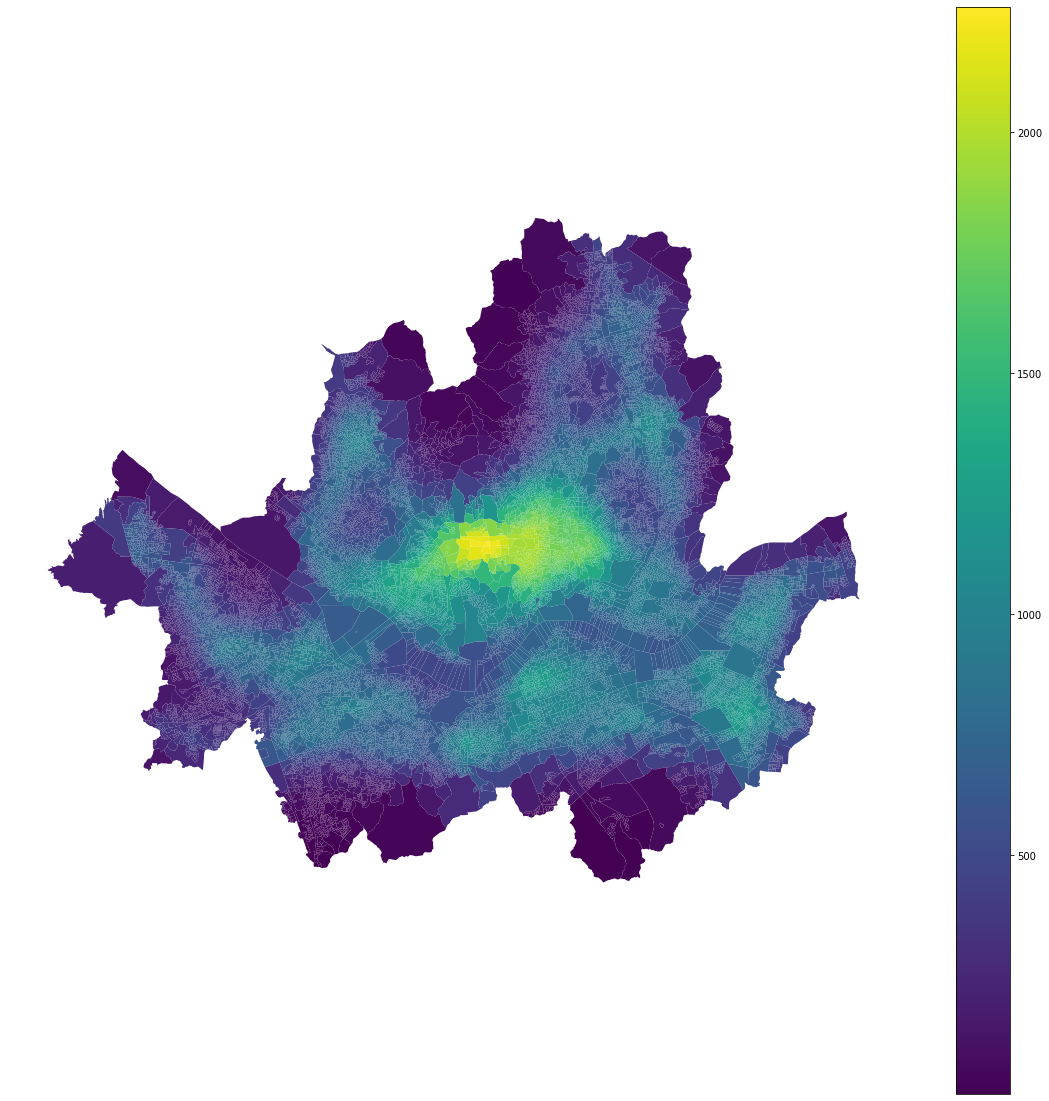

In [20]:
fig, ax = plt.subplots()
ax.axis('off')
seoul.plot('heat', ax=ax, legend=True)
#geodf.plot(geodf.columns[target_idx], ax=ax)
plt.show()